<a href="https://colab.research.google.com/github/LaraAlexLopes/Analise-Credito/blob/main/analiseCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Base de Dados Crédito

In [52]:
base_credito = pd.read_csv('/content/drive/MyDrive/analiseCredito/credit_data.csv')

In [53]:
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Informações Gerais da Base Crédito

In [54]:
base_credito.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [55]:
base_credito.tail(10)

,clientid,income,age,loan,default
1990,1991,34237.575419,34.101654,2658.090632,0
1991,1992,26300.446554,45.539385,2317.393678,0
1992,1993,30803.806165,23.250084,623.024153,0
1993,1994,54421.410155,26.821928,3273.631823,0
1994,1995,24254.700791,37.751622,2225.284643,0
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


In [56]:
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [57]:
base_credito[base_credito['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [58]:
base_credito.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

Arrumando Inconsistências

In [59]:
base_credito.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [60]:
base_credito['age'].mean()

40.80755937840458

In [61]:
base_credito['age'][base_credito['age']>0].mean()

40.92770044906149

In [62]:
base_credito.loc[base_credito['age']<0, 'age'] = 40.92

In [63]:
base_credito.loc[base_credito['age'] == 40.92]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


In [65]:
base_credito.loc[base_credito['clientid'] == 16]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0


In [66]:
base_credito.loc[base_credito['clientid'] == 22]

,clientid,income,age,loan,default
21,22,32197.620701,40.92,4244.057136,0


In [67]:
base_credito.loc[base_credito['clientid'] == 27]

,clientid,income,age,loan,default
26,27,63287.038908,40.92,9595.286289,0


In [69]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [70]:
base_credito['age'].fillna(base_credito['age'].mean(), inplace = True)

In [71]:
base_credito.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

Divisão entre Dados Previsores e Classes

In [87]:
x_credito = base_credito.iloc[:,1:4].values
y_credito = base_credito.iloc[:,4].values

In [88]:
x_credito

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [89]:
y_credito

array([0, 0, 0, ..., 1, 0, 0])

Escalonamento dos Atributos

In [90]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credito = scaler_credit.fit_transform(x_credito)

In [91]:
x_credito

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

Base de Treinamento e de Teste

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_credito_treinamento, x_credito_teste, y_credito_treinamento, y_credito_teste = train_test_split(x_credito,y_credito, test_size = 0.25,random_state = 0)

In [94]:
x_credito_treinamento.shape , y_credito_treinamento.shape

((1500, 3), (1500,))

In [95]:
x_credito_teste.shape, y_credito_teste.shape

((500, 3), (500,))

In [96]:
import pickle
with open('credito.pkl',mode = 'wb') as f:
  pickle.dump([x_credito_treinamento,y_credito_treinamento,x_credito_teste,y_credito_teste], f)

Algoritmo de Naves Bayes

In [97]:
import pickle
with open('credito.pkl','wb') as f:
  pickle.dump([x_credito_treinamento,y_credito_treinamento,x_credito_teste,y_credito_teste], f)

In [98]:
from sklearn.naive_bayes import GaussianNB

In [101]:
naive_credito = GaussianNB()
naive_credito.fit(x_credito_treinamento,y_credito_treinamento)

GaussianNB()

In [103]:
previsao = naive_credito.predict(x_credito_teste)
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [104]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [107]:
accuracy_score(y_credito_teste,previsao)

0.938

In [108]:
confusion_matrix(y_credito_teste,previsao)

array([[428,   8],
       [ 23,  41]])

0.938

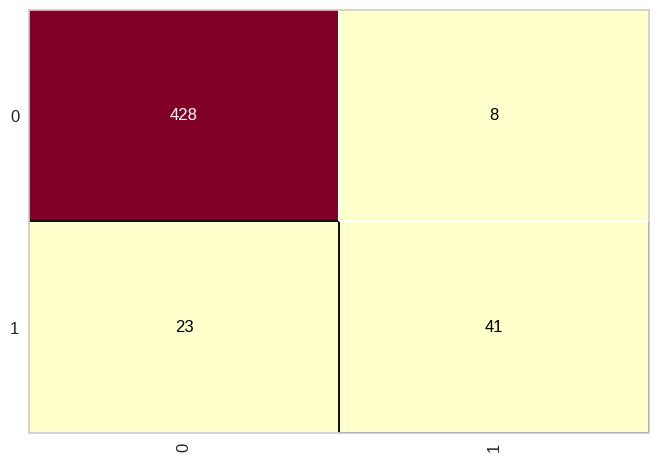

In [109]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_credito)
cm.fit(x_credito_treinamento,y_credito_treinamento)
cm.score(x_credito_teste,y_credito_teste)

Árvore de Decisão

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
arvore_credito = DecisionTreeClassifier(criterion = 'entropy')
arvore_credito.fit(x_credito_treinamento,y_credito_treinamento)

DecisionTreeClassifier(criterion='entropy')

In [113]:
arvore_credito.feature_importances_

array([0.20913479, 0.39503611, 0.39582909])

In [117]:
previsoes = arvore_credito.predict(x_credito_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [118]:
y_credito_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
accuracy_score(y_credito_teste,previsoes)

0.984

In [122]:
from sklearn.metrics import accuracy_score, classification_report

In [123]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       436
           1       0.91      0.97      0.94        64

    accuracy                           0.98       500
   macro avg       0.95      0.98      0.97       500
weighted avg       0.98      0.98      0.98       500



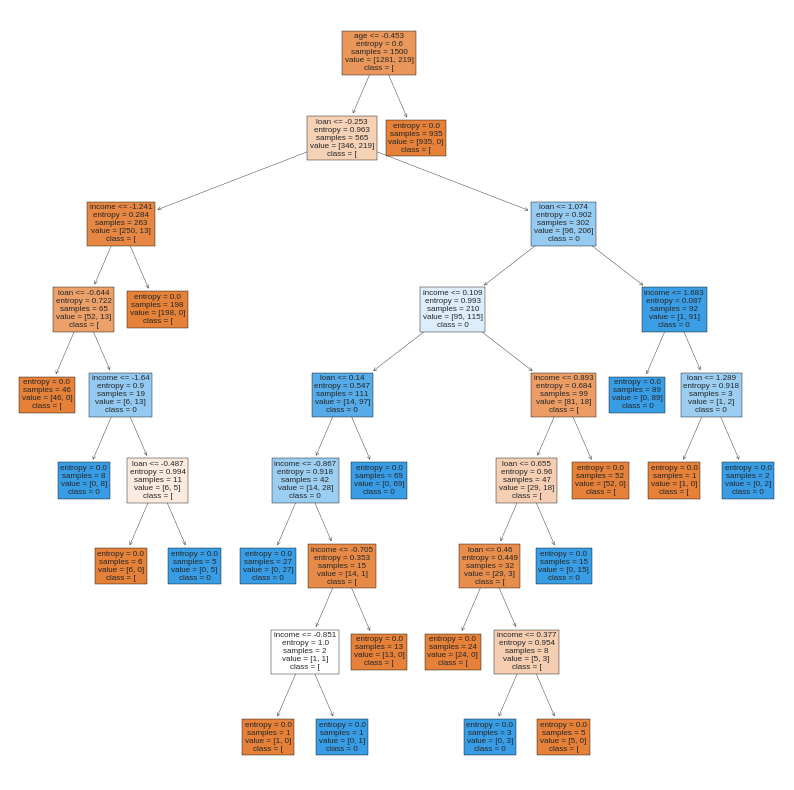

In [116]:
from sklearn import tree
previsores = ['income','age','loan']
figura,eixos = plt.subplots(nrows = 1,ncols=1,figsize=(10,10))
tree.plot_tree(arvore_credito,feature_names=previsores,class_names = str(arvore_credito.classes_),filled = True);